### 1.데이터 그룹 분석 

#### 집계합수

In [1]:
#판다스 라이브러리 불러오기
import pandas as pd 

#파일경로를 찾고 변수 file_path에 저장
file_path= 'exam_sample.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,50,98,49,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,51,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,55,w


In [9]:
 # 반별 로 그룹화(A,B,C반)
# 반별 그룹 오브젝트만 생성
df1 = df.groupby('class')
type(df1)
df[['math','english']].groupby(df['class']).mean()

,math,english
class,,
A,46.00,94.75
B,77.75,84.25
C,37.50,95.50


In [7]:
# 반 중 A반 그룹만 확인
df1.get_group('C')


,student_no,class,science,english,math,sex
8,9,C,15,98,20,w
9,10,C,45,93,55,w


In [5]:
# 반별 그룹 평균 확인
df[['science','english','math']].groupby(df['class']).mean()

,science,english,math
class,,,
A,61.50,94.75,46.00
B,58.25,84.25,77.75
C,30.00,95.50,37.50


In [ ]:
# 반별,성별 그룹 평균 확인, df뒤에 과목을 넣어서 과목 당 궁금한 것만 볼 수도 있다.
df.groupby(['class','sex']).mean()

student_no  science  english  math
class sex                                    
A     m           2.5     54.0     98.0  39.5
      w           2.5     69.0     91.5  52.5
B     m           6.5     71.5     89.5  65.5
      w           6.5     45.0     79.0  90.0
C     w           9.5     30.0     95.5  37.5

In [ ]:
# 반별 수학 평균, 두 가지 방법을 보여주는 것이다. 
df['math'].groupby(df['class']).mean()
df.groupby(df['class'])['math'].mean()

class
A    46.00
B    77.75
C    37.50
Name: math, dtype: float64

In [12]:
# 반별 수학 개수
df['math'].groupby(df['class']).count()

class
A    4
B    4
C    2
Name: math, dtype: int64

In [ ]:
# 성별 수학평균, 범주형 데이터(group by: 여기 안에는 숫자가 들어가면 안 된다.) 연속형 데이터는 다르게 되어야 한다. 
df_mean=df['math'].groupby(df['sex']).mean()

gendergroup = df.groupby('sex')

print(df_mean)
print(gendergroup)
print(gendergroup.groups)

sex
m    52.5
w    60.0
Name: math, dtype: float64
{'m': [0, 3, 5, 6], 'w': [1, 2, 4, 7, 8, 9]}


In [16]:
# 남학생 수학평균
male=gendergroup.get_group('m')
subset = male[['sex', 'math']]
print(male)
print(subset)

   student_no class  science  english  math sex
0           1     A       50       98    49   m
3           4     A       58       98    30   m
5           6     B       98       89    51   m
6           7     B       45       90    80   m
  sex  math
0   m    49
3   m    30
5   m    51
6   m    80


### 2.데이터 재구조화

#### 데이터 구간화

In [18]:
#판다스 라이브러리 불러오기
import pandas as pd 

#파일경로를 찾고 변수 file_path에 저장
file_path= 'exam_sample.csv'

#read csv()함수로 데이터프레임 변환 
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,50,98,49,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,51,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,55,w


In [19]:
#math 변수에 대해서 3개 동일한 길이로 범주형 변수로 만들어보자 범주 구간은 Categories (3, interval[float64]): [(19.93, 43.333] < (43.333, 66.667] < (66.667, 90.0]] 로 3개 구간 길이가 동일함을 알 수 있다.
df1=pd.cut(df.math, 3)
df1

0    (43.333, 66.667]
1    (43.333, 66.667]
2    (43.333, 66.667]
3     (19.93, 43.333]
4      (66.667, 90.0]
5    (43.333, 66.667]
6      (66.667, 90.0]
7      (66.667, 90.0]
8     (19.93, 43.333]
9    (43.333, 66.667]
Name: math, dtype: category
Categories (3, interval[float64, right]): [(19.93, 43.333] < (43.333, 66.667] < (66.667, 90.0]]

In [20]:
#math 변수에 3개 구간의 범주를 그룹 함수를 추가해서 각 범주의 그룹별로 agg( ) 함수인 개수(count), 평균(mean), 표준편차(std), 최소값(min), 최대값(max) 값을 계산해보자 
df2 = df.math.groupby(df1)
df2
df3=df2.agg(['count', 'mean', 'std', 'min', 'max'])
df3

C:\Users\minsu\AppData\Local\Temp\ipykernel_18676\395481365.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.math.groupby(df1)


,count,mean,std,min,max
math,,,,,
"(19.93, 43.333]",2,25.000000,7.071068,20,30
"(43.333, 66.667]",5,52.000000,5.744563,45,60
"(66.667, 90.0]",3,86.666667,5.773503,80,90


In [21]:
#pd.qcut() 함수를 사용 math에 대해서 각 범주 구간 별로 동일하게 3개의 개수를 가지도록 범주를 만들수도 있다. 이때 labels=False 로 설정하여 label이 0, 1, 2 구간을 0부터 순차적으로 1씩 증가하게 한다.  
df4= pd.qcut(df.math, 3, labels=False)
df4

0    0
1    2
2    0
3    0
4    2
5    1
6    2
7    2
8    0
9    1
Name: math, dtype: int64

In [22]:
#아래처럼 labels=np.arange(3, 0, -1)로 직접 지정을 해주면 label이 3, 2, 1 로 3부터 1씩 줄어드는 순서로 할당이 된다. 위의 label 과 정 반대로 할당이 되었다. 

import numpy as np 
df5 = pd.qcut(df.math, 3, labels=np.arange(3, 0, -1))
df5

0    3
1    1
2    3
3    3
4    1
5    2
6    1
7    1
8    3
9    2
Name: math, dtype: category
Categories (3, int64): [3 < 2 < 1]

In [23]:
 # [3 < 2 < 1] 순서로 동일 개수로 나눈 3개의 그룹별 통계량을 계산 할 수 있다. 
df6 = df.math.groupby(df5)
df7=df6.agg(['count', 'mean', 'std', 'min', 'max'])
df7

C:\Users\minsu\AppData\Local\Temp\ipykernel_18676\136207239.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df6 = df.math.groupby(df5)


,count,mean,std,min,max
math,,,,,
3,4,36.0,13.441230,20,49
2,2,53.0,2.828427,51,55
1,4,80.0,14.142136,60,90


#### 원-핫인코딩

In [24]:
# 유형확인
df.dtypes


student_no     int64
class         object
science        int64
english        int64
math           int64
sex           object
dtype: object

In [25]:
# 범주형 원핫코딩
df = pd.get_dummies(df)
df

,student_no,science,english,math,class_A,class_B,class_C,sex_m,sex_w
0,1,50,98,49,True,False,False,True,False
1,2,60,97,60,True,False,False,False,True
2,3,78,86,45,True,False,False,False,True
3,4,58,98,30,True,False,False,True,False
4,5,65,80,90,False,True,False,False,True
5,6,98,89,51,False,True,False,True,False
6,7,45,90,80,False,True,False,True,False
7,8,25,78,90,False,True,False,False,True
8,9,15,98,20,False,False,True,False,True
9,10,45,93,55,False,False,True,False,True


#### 데이터 전치

In [26]:
# 원자료
df = pd.read_csv(file_path)
df

,student_no,class,science,english,math,sex
0,1,A,50,98,49,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,51,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,55,w


In [27]:
# 전치 자료
df.T

,0,1,2,3,4,5,6,7,8,9
student_no,1,2,3,4,5,6,7,8,9,10
class,A,A,A,A,B,B,B,B,C,C
science,50,60,78,58,65,98,45,25,15,45
english,98,97,86,98,80,89,90,78,98,93
math,49,60,45,30,90,51,80,90,20,55
sex,m,w,w,m,w,m,m,w,w,w


#### 피봇테이블

In [28]:
# 원자료와 피봇 자료는 확인해보자
df

,student_no,class,science,english,math,sex
0,1,A,50,98,49,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,51,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,55,w


In [ ]:
# 반(class) 변수를 행 데이터로 피봇 # index는 행을 나타냄
pd.pivot_table(df,index='class', columns='sex', values='science')

sex,m,w
class,,
A,54.0,69.0
B,71.5,45.0
C,NaN,30.0


In [30]:
# 성별(sex) 변수를 행 데이터로 피봇
pd.pivot_table(df,index='sex', columns='class', values='science') 

class,A,B,C
sex,,,
m,54.0,71.5,NaN
w,69.0,45.0,30.0


#### 멜트 

In [31]:
# 멜트 함수 
pd.melt(df,id_vars=['student_no', 'class'])

,student_no,class,variable,value
0,1,A,science,50
1,2,A,science,60
2,3,A,science,78
3,4,A,science,58
4,5,B,science,65
5,6,B,science,98
6,7,B,science,45
7,8,B,science,25
8,9,C,science,15
9,10,C,science,45


#### 스택/언스택

In [32]:
df

,student_no,class,science,english,math,sex
0,1,A,50,98,49,m
1,2,A,60,97,60,w
2,3,A,78,86,45,w
3,4,A,58,98,30,m
4,5,B,65,80,90,w
5,6,B,98,89,51,m
6,7,B,45,90,80,m
7,8,B,25,78,90,w
8,9,C,15,98,20,w
9,10,C,45,93,55,w


In [33]:
# 스택/언스택
df5 = df.stack()
df5

0  student_no     1
   class          A
   science       50
   english       98
   math          49
   sex            m
1  student_no     2
   class          A
   science       60
   english       97
   math          60
   sex            w
2  student_no     3
   class          A
   science       78
   english       86
   math          45
   sex            w
3  student_no     4
   class          A
   science       58
   english       98
   math          30
   sex            m
4  student_no     5
   class          B
   science       65
   english       80
   math          90
   sex            w
5  student_no     6
   class          B
   science       98
   english       89
   math          51
   sex            m
6  student_no     7
   class          B
   science       45
   english       90
   math          80
   sex            m
7  student_no     8
   class          B
   science       25
   english       78
   math          90
   sex            w
8  student_no     9
   class          C


In [ ]:
df6 = df.unstack(level=-1) # 시리즈 처럼 나온다.
df6

student_no  0     1
            1     2
            2     3
            3     4
            4     5
            5     6
            6     7
            7     8
            8     9
            9    10
class       0     A
            1     A
            2     A
            3     A
            4     B
            5     B
            6     B
            7     B
            8     C
            9     C
science     0    50
            1    60
            2    78
            3    58
            4    65
            5    98
            6    45
            7    25
            8    15
            9    45
english     0    98
            1    97
            2    86
            3    98
            4    80
            5    89
            6    90
            7    78
            8    98
            9    93
math        0    49
            1    60
            2    45
            3    30
            4    90
            5    51
            6    80
            7    90
            8    20
            9    55


### 3. 시계열 데이터

#### 시간 조작

In [36]:
# Period 객체는 to_period(freq='기간인수')를 통해 datetime 변수에 대해 어떤 기간에 따른 자료형을 생성하고자 할 때 주로 활용
#datetime 유형에 대해서만 적용 가능

# 시간 정의
dates = ['2020-01-03','2020-03-01','2021-09-01']
dates


['2020-01-03', '2020-03-01', '2021-09-01']

In [ ]:
# 시간자료형 생성, 시간데이터형 들이 배열로 바뀐다.
import pandas as pd

ts_dates = pd.to_datetime(dates)
ts_dates


DatetimeIndex(['2020-01-03', '2020-03-01', '2021-09-01'], dtype='datetime64[ns]', freq=None)

In [45]:
# Timestamp를 Period변환, 평균, 표준편차 등을 구할 수 있게 된다. 
pr_day = ts_dates.to_period(freq='D')   #1일 기간
pr_day
mean_value = ts_dates.mean()
print(mean_value)

2020-08-11 16:00:00


In [39]:
pr_month = ts_dates.to_period(freq='M') #1개월 기간
pr_month

PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]')

In [40]:
pr_year = ts_dates.to_period(freq='A')  #1년 기간
pr_year

C:\Users\minsu\AppData\Local\Temp\ipykernel_18676\3708051764.py:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  pr_year = ts_dates.to_period(freq='A')  #1년 기간


PeriodIndex(['2020', '2020', '2021'], dtype='period[Y-DEC]')

#### 타임스탬프

In [46]:
#판다스 라이브러리 불러오기
import pandas as pd 
#파일경로를 찾고 변수 file_path에 저장
file_path= 'timeseries.csv'
#read csv()함수로 데이터프레임 변환 
df= pd.read_csv(file_path)

# 현재 날짜를 나타내는 Date컬럼은 문자형(object)이므로 to_datetime()함수를 이용해서 Date컬럼을 시계열 객체(Timestamp)로 변환
df.info()
df['new_Date'] = pd.to_datetime(df['Date'])
print(df.head())
print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 372.0+ bytes
         Date  Close  Start   High    Low  Volume   new_Date
0  2015-07-02  10100  10850  10900  10000  137977 2015-07-02
1  2016-06-29  10700  10550  10900   9990  170253 2016-06-29
2  2017-06-28  10400  10900  10950  10150  155769 2017-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2019-06-26  10800  10900  11000  10700   63039 2019-06-26




In [47]:
print(df.info())
print('\n')
print(type(df['new_Date'][0]))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5 non-null      object        
 1   Close     5 non-null      int64         
 2   Start     5 non-null      int64         
 3   High      5 non-null      int64         
 4   Low       5 non-null      int64         
 5   Volume    5 non-null      int64         
 6   new_Date  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 412.0+ bytes
None


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [48]:
# 기존 Date열을 지우고 new_Date를 인덱스로 지정
# 데이터요약정보를 보면, 인덱스가 DatetimeIndex변경 되었고 2015년07월02일에서 2019년06월26일 사이에 5개 날짜가 있다. 
df.drop('Date', axis = 1, inplace=True)
df.set_index('new_Date', inplace=True)
print(df.head())
print('\n')
print(df.info())

            Close  Start   High    Low  Volume
new_Date                                      
2015-07-02  10100  10850  10900  10000  137977
2016-06-29  10700  10550  10900   9990  170253
2017-06-28  10400  10900  10950  10150  155769
2018-06-27  10900  10800  11050  10500  133548
2019-06-26  10800  10900  11000  10700   63039


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2015-07-02 to 2019-06-26
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Close   5 non-null      int64
 1   Start   5 non-null      int64
 2   High    5 non-null      int64
 3   Low     5 non-null      int64
 4   Volume  5 non-null      int64
dtypes: int64(5)
memory usage: 240.0 bytes
None


In [49]:
# Timestamp와 Period의 차이 확인 , Timestamp를 Period로 변환
# Period객체는 to_period(freq='기간인수')를 통해 datetime변수에 대해 어떤 기간에 따른 자료형을 생성하고자 할 때 주로 활용된다. 아무 자료형이나 사용할 수 없고 datetime유형에 대해서만 적용 가능
dates = ['2020-01-01','2020-03-01','2021-09-01']
ts_dates = pd.to_datetime(dates)
print(ts_dates)
print('\n')

DatetimeIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='datetime64[ns]', freq=None)




In [50]:
# Timestamp를 Period변환
pr_day = ts_dates.to_period(freq='D')   #1일 기간
print(pr_day)
pr_month = ts_dates.to_period(freq='M') #1개월 기간
print(pr_month)
pr_year = ts_dates.to_period(freq='A')  #1년 기간
print(pr_year)

PeriodIndex(['2020-01-01', '2020-03-01', '2021-09-01'], dtype='period[D]')
PeriodIndex(['2020-01', '2020-03', '2021-09'], dtype='period[M]')
PeriodIndex(['2020', '2020', '2021'], dtype='period[Y-DEC]')


C:\Users\minsu\AppData\Local\Temp\ipykernel_18676\1390628452.py:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  pr_year = ts_dates.to_period(freq='A')  #1년 기간


#### 기간함수

In [51]:
timestamp_df = pd.date_range(start = '2020-01-01',  # 날짜 범위 시작
                     end = None, # 날짜 범위 끝
                     periods = 6, # 생성할 Timestamp 개수
                     freq = 'MS', # 시간 간격(MS : 월의 시작일)
                     tz = 'Asia/Seoul') # 시간대(timezone)
timestamp_df

DatetimeIndex(['2020-01-01 00:00:00+09:00', '2020-02-01 00:00:00+09:00',
               '2020-03-01 00:00:00+09:00', '2020-04-01 00:00:00+09:00',
               '2020-05-01 00:00:00+09:00', '2020-06-01 00:00:00+09:00'],
              dtype='datetime64[ns, Asia/Seoul]', freq='MS')

In [52]:
# period_range()
#Period는 기간을 나타내는 자료형 이므로, 배열을 적용할때 freq= 인자는 기간의 단위를 의미한다

# 1개월 기간
pr_m = pd.period_range(start = '2020-01-01',end = None,periods = 3,freq = 'M') 
print(pr_m)
print('\n')

# 1시간 기간
pr_h = pd.period_range(start = '2020-01-01',end = None,periods = 3,freq = 'H')           
print(pr_h)
print('\n')

# 2시간 기간
pr_2h = pd.period_range(start = '2020-01-01',end = None,periods = 3,freq = '2H')          
print(pr_2h)

PeriodIndex(['2020-01', '2020-02', '2020-03'], dtype='period[M]')


PeriodIndex(['2020-01-01 00:00', '2020-01-01 01:00', '2020-01-01 02:00'], dtype='period[h]')


PeriodIndex(['2020-01-01 00:00', '2020-01-01 02:00', '2020-01-01 04:00'], dtype='period[2h]')


C:\Users\minsu\AppData\Local\Temp\ipykernel_18676\3784112183.py:10: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pr_h = pd.period_range(start = '2020-01-01',end = None,periods = 3,freq = 'H')
C:\Users\minsu\AppData\Local\Temp\ipykernel_18676\3784112183.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pr_2h = pd.period_range(start = '2020-01-01',end = None,periods = 3,freq = '2H')


In [53]:
# 시계열 활용
# 날짜 데이터 분리 날짜 데이터 분리 : dt.year, dt.month, dt.day
#판다스 라이브러리 불러오기

import pandas as pd 
#파일경로를 찾고 변수 file_path에 저장
file_path= 'timeseries.csv'
#read csv()함수로 데이터프레임 변환 
df= pd.read_csv(file_path)
df.info()
df['new_Date'] = pd.to_datetime(df['Date'])
print(df.head())
print('\n')
 
df['Year'] = df['new_Date'].dt.year
df['Month'] = df['new_Date'].dt.month
df['Day'] = df['new_Date'].dt.hour
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    5 non-null      object
 1   Close   5 non-null      int64 
 2   Start   5 non-null      int64 
 3   High    5 non-null      int64 
 4   Low     5 non-null      int64 
 5   Volume  5 non-null      int64 
dtypes: int64(5), object(1)
memory usage: 372.0+ bytes
         Date  Close  Start   High    Low  Volume   new_Date
0  2015-07-02  10100  10850  10900  10000  137977 2015-07-02
1  2016-06-29  10700  10550  10900   9990  170253 2016-06-29
2  2017-06-28  10400  10900  10950  10150  155769 2017-06-28
3  2018-06-27  10900  10800  11050  10500  133548 2018-06-27
4  2019-06-26  10800  10900  11000  10700   63039 2019-06-26




,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,0
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,0
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,0
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,0
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,0


In [54]:
# to_period()함수를 이용해 표기 변경 
df['Date_yr'] = df['new_Date'].dt.to_period(freq = 'A')  # 연도까지
df['Date_m'] = df['new_Date'].dt.to_period(freq = 'H')   # 연월까지
df.head()

C:\Users\minsu\AppData\Local\Temp\ipykernel_18676\3411426597.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'Y' instead.
  df['Date_yr'] = df['new_Date'].dt.to_period(freq = 'A')  # 연도까지
C:\Users\minsu\AppData\Local\Temp\ipykernel_18676\3411426597.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['Date_m'] = df['new_Date'].dt.to_period(freq = 'H')   # 연월까지


,Date,Close,Start,High,Low,Volume,new_Date,Year,Month,Day,Date_yr,Date_m
0,2015-07-02,10100,10850,10900,10000,137977,2015-07-02,2015,7,0,2015,2015-07-02 00:00
1,2016-06-29,10700,10550,10900,9990,170253,2016-06-29,2016,6,0,2016,2016-06-29 00:00
2,2017-06-28,10400,10900,10950,10150,155769,2017-06-28,2017,6,0,2017,2017-06-28 00:00
3,2018-06-27,10900,10800,11050,10500,133548,2018-06-27,2018,6,0,2018,2018-06-27 00:00
4,2019-06-26,10800,10900,11000,10700,63039,2019-06-26,2019,6,0,2019,2019-06-26 00:00


In [55]:
# 날짜 인덱스 지정
df.set_index('new_Date',inplace=True)
df.head()

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,Date_m
new_Date,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,0,2015,2015-07-02 00:00
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,0,2016,2016-06-29 00:00
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,0,2017,2017-06-28 00:00
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,0,2018,2018-06-27 00:00
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,0,2019,2019-06-26 00:00


In [58]:
# 날짜 인덱싱
print(df.loc['2015-07']) # 7월에 해당하는 row 인덱싱
print('\n')
print(df.loc['2019-06']) # 6월에 해당하는 row 인덱싱
print('\n')
print(df['2018-06-25' : '2018-06-20'])  # 해당기간의 인덱싱

                  Date  Close  Start   High    Low  Volume  Year  Month  Day  \
new_Date                                                                       
2015-07-02  2015-07-02  10100  10850  10900  10000  137977  2015      7    0   

           Date_yr            Date_m  
new_Date                              
2015-07-02    2015  2015-07-02 00:00  


                  Date  Close  Start   High    Low  Volume  Year  Month  Day  \
new_Date                                                                       
2019-06-26  2019-06-26  10800  10900  11000  10700   63039  2019      6    0   

           Date_yr            Date_m  
new_Date                              
2019-06-26    2019  2019-06-26 00:00  


Empty DataFrame
Columns: [Date, Close, Start, High, Low, Volume, Year, Month, Day, Date_yr, Date_m]
Index: []


In [59]:
# 오늘날짜와 차리 열 추가
today = pd.to_datetime('2020-03-18')
df['time_diff'] = today - df.index
df.head()

,Date,Close,Start,High,Low,Volume,Year,Month,Day,Date_yr,Date_m,time_diff
new_Date,,,,,,,,,,,,
2015-07-02,2015-07-02,10100,10850,10900,10000,137977,2015,7,0,2015,2015-07-02 00:00,1721 days
2016-06-29,2016-06-29,10700,10550,10900,9990,170253,2016,6,0,2016,2016-06-29 00:00,1358 days
2017-06-28,2017-06-28,10400,10900,10950,10150,155769,2017,6,0,2017,2017-06-28 00:00,994 days
2018-06-27,2018-06-27,10900,10800,11050,10500,133548,2018,6,0,2018,2018-06-27 00:00,630 days
2019-06-26,2019-06-26,10800,10900,11000,10700,63039,2019,6,0,2019,2019-06-26 00:00,266 days


<Axes: xlabel='new_Date'>

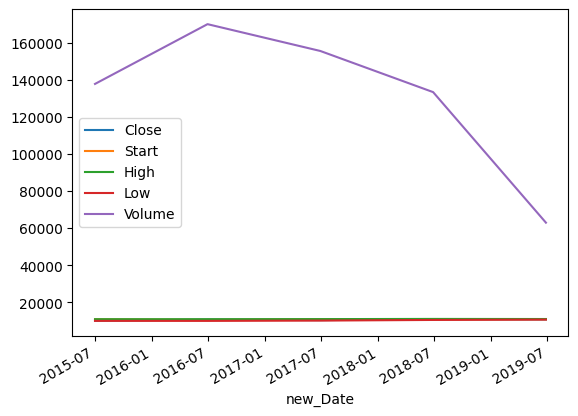

In [63]:
# 데이터를 다시 불러와 시간 인덱스 지정 후 단순 시각화
import pandas as pd 
#파일경로를 찾고 변수 file_path에 저장
file_path= 'timeseries.csv'
#read csv()함수로 데이터프레임 변환 
df= pd.read_csv(file_path)
df['new_Date'] = pd.to_datetime(df['Date'])
df.set_index('new_Date',inplace=True)
df.plot()